# Day 8 – Role-wise Attrition Analysis

Objective:
Analyze employee attrition across job roles, job levels, and tenure to identify high-risk segments.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import files
files.upload()


Saving HR_Cleaned_Day6.csv to HR_Cleaned_Day6.csv


{'HR_Cleaned_Day6.csv': b'Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager\n41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5\n49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7\n37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0\n33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,

In [2]:
import os
os.listdir('/content')


['.config', 'HR_Cleaned_Day6.csv', 'sample_data']

In [3]:
import pandas as pd

df = pd.read_csv('/content/HR_Cleaned_Day6.csv')
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [4]:
df.shape
df['Attrition'].value_counts()


,count
Attrition,
0,1233
1,237


In [5]:
#ATTRITION BY JOB ROLE (CORE OUTPUT)

role_attrition = (
    df.groupby('JobRole')['Attrition']
      .mean()
      .sort_values(ascending=False) * 100
)

role_attrition.round(2)


,Attrition
JobRole,
Sales Representative,39.76
Laboratory Technician,23.94
Human Resources,23.08
Sales Executive,17.48
Research Scientist,16.10
Manufacturing Director,6.90
Healthcare Representative,6.87
Manager,4.90
Research Director,2.50


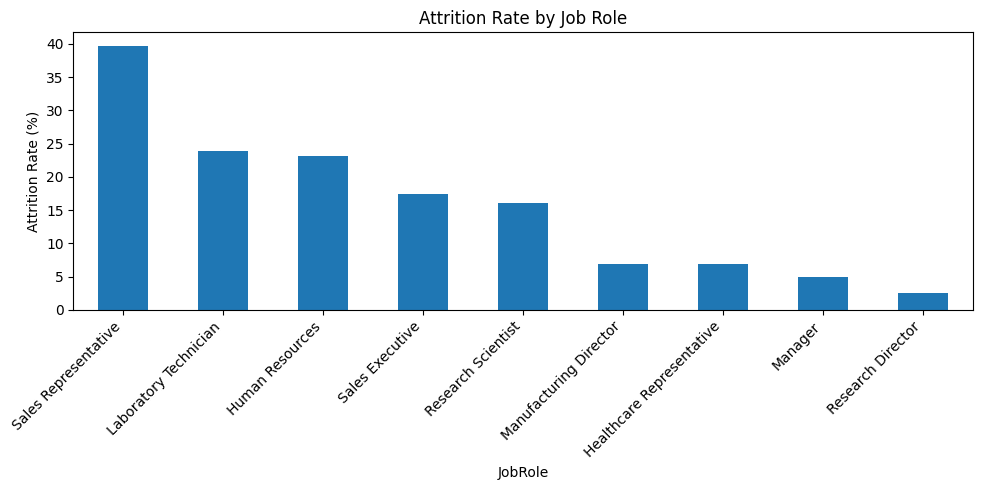

In [6]:
#VISUALIZE ROLE-WISE ATTRITION

role_attrition.plot(kind='bar', figsize=(10,5))
plt.title('Attrition Rate by Job Role')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Key Insights – Role-wise Attrition

1. Sales Representatives show the highest attrition rate (~40%), indicating high pressure, performance-based stress, or compensation-related dissatisfaction.
2. Laboratory Technicians and Human Resources roles also experience relatively high attrition, suggesting operational workload or limited growth opportunities.
3. Managerial and senior technical roles exhibit much lower attrition, indicating higher job stability and retention at senior levels.


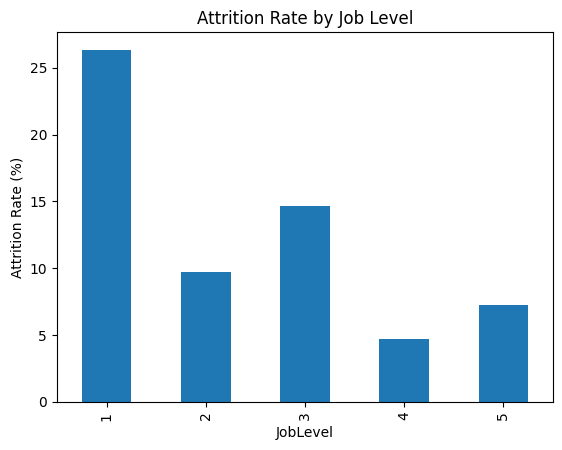

In [8]:
#ATTRITION BY JOB LEVEL

level_attrition = (
    df.groupby('JobLevel')['Attrition']
      .mean() * 100
)

level_attrition.round(2)

level_attrition.plot(kind='bar')
plt.title('Attrition Rate by Job Level')
plt.ylabel('Attrition Rate (%)')
plt.show()



In [9]:
#ATTRITION VS TENURE

df['TenureGroup'] = pd.cut(
    df['YearsAtCompany'],
    bins=[0, 2, 5, 10, 40],
    labels=['<2 years', '2–5 years', '5–10 years', '10+ years']
)

tenure_attrition = (
    df.groupby('TenureGroup')['Attrition']
      .mean() * 100
)

tenure_attrition.round(2)


/tmp/ipython-input-2960184889.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('TenureGroup')['Attrition']


,Attrition
TenureGroup,
<2 years,28.86
2–5 years,13.82
5–10 years,12.28
10+ years,8.13
